Cidade: APARECIDA
Total de jovens: 5869
Total de idosos: 6446
Cidade: CAÇAPAVA
Total de jovens: 15375
Total de idosos: 16078
Cidade: CACHOEIRA PAULISTA
Total de jovens: 5098
Total de idosos: 6096
Cidade: CANAS
Total de jovens: 949
Total de idosos: 724
Cidade: CUNHA
Total de jovens: 3712
Total de idosos: 3418
Cidade: GUARATINGUETÁ
Total de jovens: 19191
Total de idosos: 22030
Cidade: IGARATÁ
Total de jovens: 1962
Total de idosos: 2045
Cidade: JACAREÍ
Total de jovens: 36304
Total de idosos: 37589
Cidade: JAMBEIRO
Total de jovens: 1048
Total de idosos: 1083
Cidade: LAGOINHA
Total de jovens: 997
Total de idosos: 1309
Cidade: LORENA
Total de jovens: 13206
Total de idosos: 15468
Cidade: NATIVIDADE DA SERRA
Total de jovens: 1069
Total de idosos: 1823
Cidade: PARAIBUNA
Total de jovens: 2971
Total de idosos: 3425
Cidade: PINDAMONHANGABA
Total de jovens: 25987
Total de idosos: 25396
Cidade: PIQUETE
Total de jovens: 1923
Total de idosos: 2444
Cidade: POTIM
Total de jovens: 3032
Total de idosos: 2

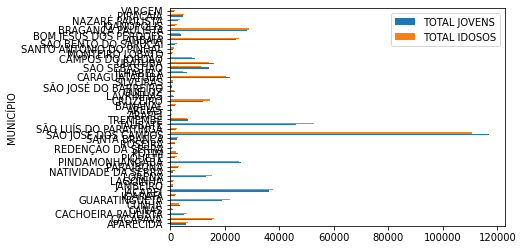

In [51]:
# 4.5
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvPerfilEleitorado2020 = './dados/perfil_eleitorado_2020.csv'

dataPerfilEleitorado2020 = pd.read_csv(csvPerfilEleitorado2020, sep= ';', encoding='ISO-8859-1')

def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

query = createQuery(abrangencia)

dfPerfilEleitorado2020 = pd.DataFrame(data = dataPerfilEleitorado2020.query(query), columns=['CD_MUNICIPIO', 'DS_FAIXA_ETARIA', 'QT_ELEITORES_PERFIL'])
dfm = pd.DataFrame(columns=["REGIÃO", "MUNICÍPIO", "TOTAL JOVENS", "TOTAL IDOSOS"])
# listResults = []

def generateChart(list, label):
        listResults = []
        for abr_code in list:
                filtroCidade = dfPerfilEleitorado2020.query('CD_MUNICIPIO == ' + str(abr_code["codigo"]))
                filtroEleitoresFaixaEtaria = filtroCidade.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
                
                faixa18 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('18 anos')]).values
                faixa19 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('19 anos')]).values
                faixa20 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('20 anos')]).values
                faixa21 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('21 a 24 anos')]).values
                faixa25a29 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('25 a 29 anos')]).values
                
                faixa60 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('60 a 64 anos')]).values
                faixa65 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('65 a 69 anos')]).values
                faixa70 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('70 a 74 anos')]).values
                faixa75 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('75 a 79 anos')]).values
                faixa80 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('80 a 84 anos')]).values
                faixa85 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('85 a 89 anos')]).values
                faixa90 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('90 a 94 anos')]).values
                faixa95 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('95 a 99 anos')]).values
                faixa100 = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('100 anos ou mais')]).values
                
                if len(faixa18) == 0: faixa18 = [0]
                if len(faixa19) == 0: faixa19 = [0]
                if len(faixa20) == 0: faixa20 = [0]
                if len(faixa21) == 0: faixa21 = [0]
                if len(faixa25a29) == 0: faixa25a29 = [0]    
                if len(faixa60) == 0: faixa60 = [0]
                if len(faixa65) == 0: faixa65 = [0]
                if len(faixa70) == 0: faixa70 = [0]
                if len(faixa75) == 0: faixa75 = [0]
                if len(faixa80) == 0: faixa80 = [0]
                if len(faixa85) == 0: faixa85 = [0]
                if len(faixa90) == 0: faixa90 = [0]
                if len(faixa95) == 0: faixa95 = [0]
                if len(faixa100) == 0: faixa100 = [0]
                
                faixa18 = faixa18[0]
                faixa19 = faixa19[0]
                faixa20 = faixa20[0]
                faixa21 = faixa21[0]
                faixa25a29 = faixa25a29[0]
                faixa60 = faixa60[0]
                faixa65 = faixa65[0]
                faixa70 = faixa70[0]
                faixa75 = faixa75[0]
                faixa80 = faixa80[0]
                faixa85 = faixa85[0]
                faixa90 = faixa90[0]
                faixa95 = faixa95[0]
                faixa100 = faixa100[0]
                
                total_jovens = faixa18 + faixa19 + faixa20 + faixa21 + faixa25a29
                total_idosos = faixa60 + faixa65 + faixa70 + faixa75 + faixa80 + faixa85 + faixa90 + faixa95 + faixa100
                
                print('Cidade: ' + abr_code['cidade'])
                print('Total de jovens: ' + str(total_jovens))
                print('Total de idosos: ' + str(total_idosos))

                dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "TOTAL JOVENS":[total_jovens], "TOTAL IDOSOS":[total_idosos]})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        print(label)
        dfm.plot(kind="barh", x="MUNICÍPIO")

generateChart(abrangencia, 'Cobertura da vangurada: ')


Cidade: CARAGUATATUBA
Total de jovens: 21899
Total de idosos: 20647
Cidade: ILHABELA
Total de jovens: 6189
Total de idosos: 4778
Cidade: SÃO SEBASTIÃO
Total de jovens: 14396
Total de idosos: 11208
Cidade: UBATUBA
Total de jovens: 16078
Total de idosos: 14263
LITORAL NORTE


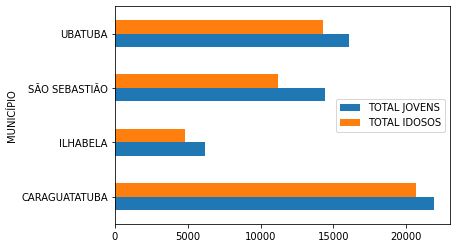

In [52]:
regiao = "LITORAL NORTE"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['regiao'] == regiao:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, regiao)